In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import ast

In [4]:
df_full_ra_rap = pd.read_excel("full_ra_rap.xlsx")
df_dca_2006 = pd.read_excel("dca_2006_summary3.xlsx")
df_dca_2007 = pd.read_excel("dca_2007_summary3.xlsx")
df_mca_2006 = pd.read_excel("mca_2006_summary3.xlsx")
df_mca_2007 = pd.read_excel("mca_2007_summary3.xlsx")


In [5]:
df_mca_2006[["District Court docket number","מס התיק"]]

,District Court docket number,מס התיק
0,40079/05,11541/05
1,40079/05,11733/05
2,1146/02,"1241/04, 1286/04"
3,2011/06,3300/06
4,8225/02,9998/05
...,...,...
579,40075-04,7176/04
580,1242/02,7899/05
581,8101/05,7720/05
582,40213/02,8087/03


In [6]:
def print_column_info(df, df_name):
    print(f"\n{df_name} Column Information:")
    print(df.info())

In [7]:
print_column_info(df_full_ra_rap, "Full RA RAP")


Full RA RAP Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20610 entries, 0 to 20609
Columns: 140 entries, מספר תיק to Year
dtypes: float64(9), int64(4), object(127)
memory usage: 22.0+ MB
None


In [8]:
df_dca_2007.columns

Index(['File Name', 'Sheet Name', 'District Court docket number',
       'Day of Supreme Court decision', 'Justice 1’s activity',
       'Name(s) of appellant in the Supreme Court',
       'Year of Magistrates’ Court decision', 'Outcome of case',
       'according to the part in the original court',
       'Day of Magistrates’ Court decision', 'Magistrates’ Court case type',
       'Nature of Supreme Court’s jurisdiction :',
       'Legal status of appellee in the Supreme Court',
       'Year of Supreme Court decision', 'Case type',
       'Who appealed the district Court decision (if applicable)',
       'Magistrates’ Court docket number',
       'Our internal case identification number',
       'according to the part in this court',
       'Month of District Court decision', 'Supreme court docket number',
       'Day of District Court decision',
       'Magistrates’ District Court ruling favored (if needed)',
       'District court case type', 'Justice name 3', 'Justice name 2',
    

In [11]:
print_column_info(df_dca_2006, "DCA 2006")


DCA 2006 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 46 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   File Name                                                     470 non-null    object 
 1   Sheet Name                                                    470 non-null    object 
 2   District Court docket number                                  470 non-null    object 
 3   Day of Supreme Court decision                                 470 non-null    float64
 4   Justice 1’s activity                                          470 non-null    object 
 5   Name(s) of appellant in the Supreme Court                     470 non-null    object 
 6   Year of Magistrates’ Court decision                           470 non-null    object 
 7   Outcome of case                          

# Merge

## Merge external tables

In [12]:

# שינוי שם העמודה של מספר התיק כדי לבצע מיזוג תקין בכל הטבלאות
df_dca_2006.rename(columns={"Supreme court docket number": "מספר תיק"}, inplace=True)
df_dca_2007.rename(columns={"Supreme court docket number": "מספר תיק"}, inplace=True)
df_mca_2006.rename(columns={"מס התיק": "מספר תיק"}, inplace=True)
df_mca_2007.rename(columns={"מס התיק": "מספר תיק"}, inplace=True)


df_dca_2006["dca"] , df_dca_2007["dca"] = 1, 1
df_mca_2006["dca"] , df_mca_2007["dca"] = 0, 0


# איחוד כל הטבלאות החיצוניות לטבלה אחת
df_combined = pd.concat([df_dca_2006, df_dca_2007, df_mca_2006, df_mca_2007], ignore_index=True)

df_combined.to_excel("df_data_combined.xlsx", index=False)

print(f'מספר השורות בטבלה המאוחדת: {df_combined.shape[0]}')


מספר השורות בטבלה המאוחדת: 2201


In [13]:
print_column_info(df_dca_2007, "DCA 2007")


DCA 2007 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 39 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   File Name                                                     390 non-null    object 
 1   Sheet Name                                                    390 non-null    object 
 2   District Court docket number                                  390 non-null    object 
 3   Day of Supreme Court decision                                 390 non-null    float64
 4   Justice 1’s activity                                          390 non-null    object 
 5   Name(s) of appellant in the Supreme Court                     390 non-null    object 
 6   Year of Magistrates’ Court decision                           390 non-null    object 
 7   Outcome of case                          

In [14]:
print_column_info(df_mca_2006, "MCA 2006")



MCA 2006 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   File Name                                       584 non-null    object 
 1   Sheet Name                                      584 non-null    object 
 2   District Court docket number                    584 non-null    object 
 3   Justice name 5                                  584 non-null    object 
 4   Justice 1’s activity                            584 non-null    object 
 5   Name(s) of appellant in the Supreme Court       584 non-null    object 
 6   Outcome of case                                 584 non-null    object 
 7   according to the part in the original court     584 non-null    object 
 8   Nature of Supreme Court’s jurisdiction :        584 non-null    object 
 9   מס סידורי של 

In [15]:
print_column_info(df_mca_2007, "MCA 2007")



MCA 2007 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 44 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   File Name                                                     757 non-null    object 
 1   Sheet Name                                                    757 non-null    object 
 2   District Court docket number                                  757 non-null    object 
 3   Justice 1’s activity                                          757 non-null    object 
 4   Name(s) of appellant in the Supreme Court                     757 non-null    object 
 5   Outcome of case                                               757 non-null    object 
 6   according to the part in the original court                   757 non-null    object 
 7   Year of Magistrates’ Court decision      

In [16]:
df_full_ra_rap

,מספר תיק,מספר החלטות בתיק,שם הליך,שנת פתיחת ההליך,מספר הליך,סוג הליך,פירוט סוג הליך,תיק חסוי,תאריך אירוע אחרון,משך התיק בימים,...,סוג גורם שיפוטי דלמטה,סוג בית משפט דלמטה,מקום בית משפט דלמטה,הליך מאוחד,שמות ההליכים המאוחדים,צדדים נוספים,מספר תיק מלא,מספר השופטים,ניתנה החלטה כמבוקש הבקשה,Year
0,5821/18,2,"ע""פ 5821/18",2018,"ע""פ 5821/18","ע""פ",ערעור פלילי,0.0,2018-11-22,108,...,['שופט'],['מחוזי '],['חיפה'],NaN,NaN,NaN,NaN,NaN,NaN,2018
1,4217/18,10,"ע""פ 4217/18",2018,"ע""פ 4217/18","ע""פ",ערעור פלילי,1.0,1900-01-01,-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
2,4344/18,2,"ע""פ 4344/18",2018,"ע""פ 4344/18","ע""פ",ערעור פלילי,0.0,2019-08-18,439,...,['שופט'],['מחוזי '],['מרכז-לוד'],NaN,NaN,NaN,NaN,NaN,NaN,2018
3,1993/18,4,"ע""פ 1993/18",2018,"ע""פ 1993/18","ע""פ",ערעור פלילי,1.0,1900-01-01,-2,...,NaN,NaN,NaN,1.0,"[['ע""פ 1993/18', 'ע""פ 2017/18']]",NaN,NaN,NaN,NaN,2018
4,4993/18,4,"ע""פ 4993/18",2018,"ע""פ 4993/18","ע""פ",ערעור פלילי,1.0,1900-01-01,-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20605,7505/21,1,"רע""פ 7505/21 טל גויחמו נ. מדינת ישראל",2021,"רע""פ 7505/21","רע""פ",רשות ערעור פלילי,0.0,2021-11-11,4,...,"['שופט', 'שופט']","['תעבורה', 'מחוזי ']","['פתח תקווה', 'מרכז-לוד']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20606,513/21,3,"רע""פ 513/21 עידנ יהושע נ. מדינת ישראל",2021,"רע""פ 513/21","רע""פ",רשות ערעור פלילי,0.0,2021-03-22,56,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['באר שבע', 'אשקלון']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20607,225/21,1,"רע""פ 225/21 אלקאר דביר בע""מ נ. מדינת ישראל",2021,"רע""פ 225/21","רע""פ",רשות ערעור פלילי,0.0,2021-02-11,30,...,"['שופט', 'שופט']","['מחוזי ', 'עניינים מקומיים']","['תל אביב', 'תל אביב']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20608,4075/21,1,"רע""פ 4075/21 דב הרמנ נ. מדינת ישראל",2021,"רע""פ 4075/21","רע""פ",רשות ערעור פלילי,0.0,2021-06-10,0,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['תל אביב', 'תל אביב']",NaN,NaN,NaN,NaN,NaN,NaN,2021


In [17]:
df_combined.columns

Index(['File Name', 'Sheet Name', 'District Court docket number',
       'Day of Supreme Court decision', 'Justice 1’s activity',
       'Name(s) of appellant in the Supreme Court',
       'Year of Magistrates’ Court decision', 'Outcome of case',
       'according to the part in the original court',
       'Day of Magistrates’ Court decision', 'Magistrates’ Court case type',
       'Nature of Supreme Court’s jurisdiction :',
       'Legal status of appellee in the Supreme Court',
       'Year of Supreme Court decision', 'Supreme court ruling favored :',
       'Case type', 'Who appealed the district Court decision (if applicable)',
       'Magistrates’ Court docket number',
       'Our internal case identification number',
       'according to the part in this court',
       'Month of District Court decision', 'מספר תיק',
       'District court ruling favored :', 'Day of District Court decision',
       'Magistrates’ District Court ruling favored (if needed)',
       'District court ca

In [18]:
len(df_full_ra_rap["מספר תיק"].unique())

20607

In [19]:
len(df_combined['מספר תיק'].unique())

2187

In [21]:
df_full_ra_rap.shape[0]

20610

In [22]:
df_combined.shape[0]

2201

In [23]:
df_combined = df_combined[df_combined["מספר תיק"] != "cannot tell"]
df_combined.shape[0]

2201

In [24]:
len(df_combined["מספר תיק"].unique())

2187

In [25]:
len(df_combined[df_combined["מספר תיק"].duplicated()==True])

14

In [26]:
df_combined.drop_duplicates(subset="מספר תיק", inplace=True)

In [27]:
df_combined.shape[0]

2187

In [28]:
# מציאת מספרי תיק המשותפים לשתי הטבלאות
common_case_numbers = pd.merge(df_full_ra_rap[['מספר תיק']], df_combined[['מספר תיק']], on="מספר תיק", how="inner")

num_common_case_numbers = len(common_case_numbers)

print(f"Number of common case numbers: {num_common_case_numbers}")

Number of common case numbers: 1742


## Merge external with the main DF

In [29]:

# פונקציה למיזוג והשלמת הערכים
def merge_and_update(main_df, additional_df):
    merged_df = pd.merge(main_df, additional_df, on="מספר תיק", how="inner")
    return merged_df


final_df = merge_and_update(df_full_ra_rap, df_combined)

try:
    final_df.to_excel("full_final_merged_data_combined_all_columns.xlsx", index=False)
    print("Data saved successfully to Excel!")
except Exception as e:
    print(f"Error saving data to Excel: {e}")

print(f'מספר השורות בטבלה הסופית לאחר המיזוג: {final_df.shape[0]}')


Data saved successfully to Excel!
מספר השורות בטבלה הסופית לאחר המיזוג: 1742


# Outcome of case

In [30]:
final_df["Outcome of case"].unique()

array(['O R', 'O A', 'O RETURN TO COURT',
       'O Approved in part + Denied in part', 'G R',
       'O COMPROMISE VERDICT', 'O R RETURN TO COURT', 'O WITHDRAWAL',
       'O approved in part + denied in part', 'O R COMPROMISE VERDICT',
       "G A Granted with the state's consent. The appeal itself was denied",
       'G A',
       'G R substential matter that was resolved with no consequences on the defendant (as the state consented)',
       'G V (vacated in part)', 'D A', 'D', 'O V', 'O R A',
       "G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained.",
       "D RETURN TO COURT Erased due to the fact that the procedure in the Magistrates Court wasn't finished",
       'Crim + Sent A G', 'G', 'G RETURN TO COURT',
       "G WITHDRAWAL V Appellant was aquitted of one felony with appellee's consent. The rest of the appeal was withdrawaled.",
       "G R partially, with appellee's consent", 'O A WITHDRAWAL',
       'Crim + Sent A D', 'Cri

In [31]:
final_df.dropna(subset=["Outcome of case"],inplace=True)

In [32]:
final_df["Outcome of case"].unique()

array(['O R', 'O A', 'O RETURN TO COURT',
       'O Approved in part + Denied in part', 'G R',
       'O COMPROMISE VERDICT', 'O R RETURN TO COURT', 'O WITHDRAWAL',
       'O approved in part + denied in part', 'O R COMPROMISE VERDICT',
       "G A Granted with the state's consent. The appeal itself was denied",
       'G A',
       'G R substential matter that was resolved with no consequences on the defendant (as the state consented)',
       'G V (vacated in part)', 'D A', 'D', 'O V', 'O R A',
       "G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained.",
       "D RETURN TO COURT Erased due to the fact that the procedure in the Magistrates Court wasn't finished",
       'Crim + Sent A G', 'G', 'G RETURN TO COURT',
       "G WITHDRAWAL V Appellant was aquitted of one felony with appellee's consent. The rest of the appeal was withdrawaled.",
       "G R partially, with appellee's consent", 'O A WITHDRAWAL',
       'Crim + Sent A D', 'Cri

In [33]:
len(final_df["מספר תיק"].unique())

1742

In [34]:
(final_df["Outcome of case"].value_counts())

,count
Outcome of case,
O A,741
D A,506
O R,212
D,109
G A,20
Crim + Sent A D,18
O Approved in part + Denied in part,17
G R,12
Crim + Sub A D,10


In [35]:
final_df.drop_duplicates(subset="מספר תיק", inplace=True)

In [36]:
len(final_df["מספר תיק"].unique())

1742

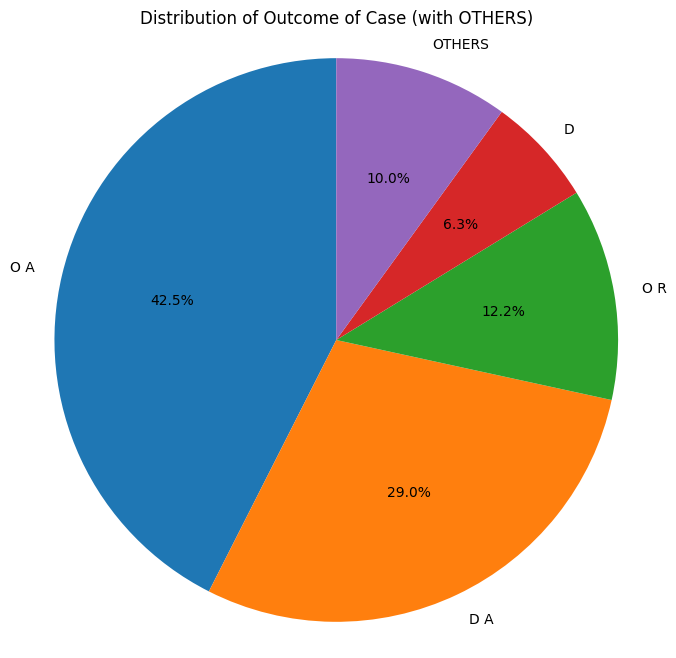

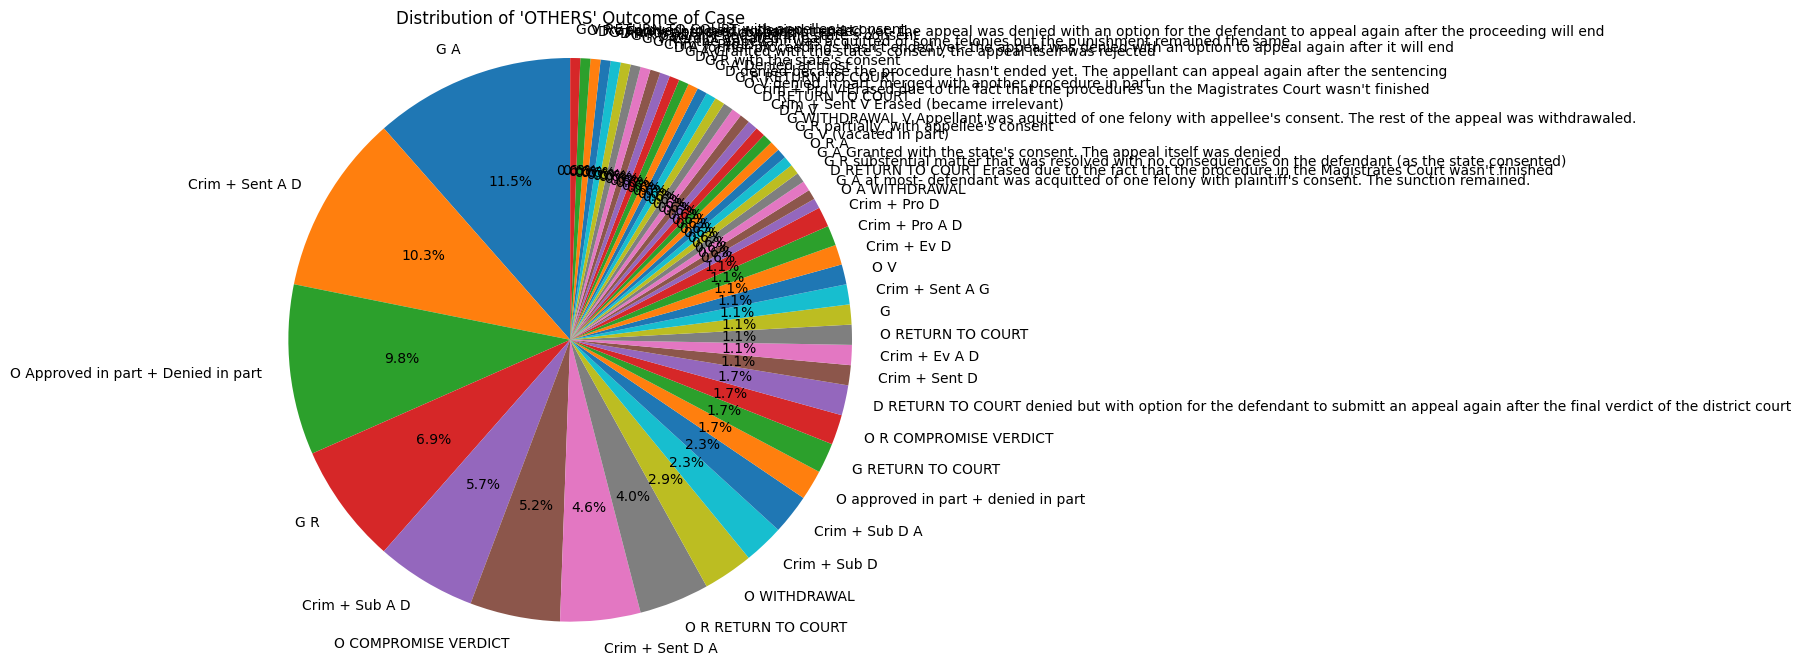

In [37]:
threshold = 0.05 * final_df["Outcome of case"].value_counts().sum()

# חלוקת הערכים לקטגוריות: ערכים קטנים יסווגו כ- "OTHERS"
outcome_counts = final_df["Outcome of case"].value_counts()
large_outcomes = outcome_counts[outcome_counts >= threshold]
small_outcomes = outcome_counts[outcome_counts < threshold]

# הוספת "OTHERS" לקטגוריות הגדולות
large_outcomes["OTHERS"] = small_outcomes.sum()

# יצירת גרף עוגה לקטגוריות הגדולות + "OTHERS"
plt.figure(figsize=(8, 8))
plt.pie(large_outcomes, labels=large_outcomes.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Outcome of Case (with OTHERS)")
plt.axis('equal')  # לשמור על יחס שווה בין צירי X ו-Y
plt.show()

# יצירת גרף עוגה נפרד לקטגוריות הקטנות שסווגו תחת "OTHERS"
plt.figure(figsize=(8, 8))
plt.pie(small_outcomes, labels=small_outcomes.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of 'OTHERS' Outcome of Case")
plt.axis('equal')  # לשמור על יחס שווה בין צירי X ו-Y
plt.show()


# Clean Doc's body - נקיון גוף המסמך

In [38]:
print((final_df["גוף המסמך"].iloc[2]))

['\n\n\n\n\nפסק-דין בתיק ע"פ  4379/02\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xa0\n\n\n\n\n \n  \n  בבית המשפט\n  העליון\xa0\xa0 בשבתו כבית משפט לערעורים פליליים\n  \n \n\n\n\n\n\xa0\n\n\n\n\n \n  \n  ע"פ\xa0 4379/02\n  \n \n\n\n\n\n\xa0\n\n\n\n\n \n  \n  בפני:\xa0\xa0 \n  \n  \n  כבוד הנשיא א\' ברק\n  \n \n \n  \n  \xa0\n  \n  \n  כבוד המישנה לנשיא מ\' חשין\n  \n \n \n  \n  \xa0\n  \n  \n  כבוד השופטת א\' חיות\n  \n \n\n\n\n\n\xa0\n\n\n\n\n \n  \n  המערער:\n  \n  \n  פלוני\n  \n \n\n\n\n\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 \n\n\n\n\n \n  \n  \xa0\n  \n  \n  נ\xa0 ג\xa0 ד\n  \n \n\n\n\n\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa

In [39]:
# פונקציה להמרת טקסט שמופיע כרשימה למחרוזת רגילה
def convert_list_to_string(text):
    if isinstance(text, str) and text.startswith("[") and text.endswith("]"):
        try:
            # מנסה להמיר את התוכן בתוך הסוגריים לרשימה אמיתית
            text_list = ast.literal_eval(text)
            # איחוד המחרוזות לרצף טקסט אחד
            return ' '.join(text_list)
        except (ValueError, SyntaxError):
            return text
    return text

# פונקציה לניקוי התווים המיותרים
def clean_text(text):
    if isinstance(text, list):
        text = ' '.join(text)  # הפיכת רשימה למחרוזת
    elif isinstance(text, str):
        # הסרת תווי רווח מיותרים ותווים מיוחדים
        text = re.sub(r'\n+', ' ', text)  # הסרת שורות חדשות מרובות
        text = re.sub(r'\\n', '', text)   # הסרת תווי newline \n מהטקסט
        text = re.sub(r'\\xa0', ' ', text)  # הסרת תווי \xa0 מהטקסט
        text = re.sub(r'\s+', ' ', text)  # הסרת רווחים מרובים
        return text.strip()
    return text

# הדפסת שורות לא קריאות לפני המרה
print("שורות לא קריאות לפני המרה:")
print(final_df["גוף המסמך"].head())

# המרה של הטקסטים הלא קריאים לטקסטים קריאים ושמירה על הדאטה המקורי
final_df["גוף המסמך"] = final_df["גוף המסמך"].apply(clean_text)

print("\nשורות לאחר המרה:")
print(final_df["גוף המסמך"].head())

file_path = 'full_final_df_cleaned.csv'
final_df.to_csv(file_path, index=False, encoding='utf-8')

print(f"הקובץ נשמר בהצלחה בנתיב: {file_path}")


שורות לא קריאות לפני המרה:
0    ['פסק דין בתיק ע"פ 9917/02 בבית המשפט העליון ב...
1    ['\n\n\n\n\nפסק-דין בתיק ע"פ  845/02\n\n\n\n\n...
2    ['\n\n\n\n\nפסק-דין בתיק ע"פ  4379/02\n\n\n\n\...
3    ['פסק דין בתיק ע"פ 9059/03 בבית המשפט העליון ב...
4    ['\n\n\n\n\nפסק-דין בתיק ע"פ  7075/03\n\n\n\n\...
Name: גוף המסמך, dtype: object

שורות לאחר המרה:
0    ['פסק דין בתיק ע"פ 9917/02 בבית המשפט העליון ב...
1    ['פסק-דין בתיק ע"פ 845/02 בבית המשפט העליון בש...
2    ['פסק-דין בתיק ע"פ 4379/02 בבית המשפט העליון ב...
3    ['פסק דין בתיק ע"פ 9059/03 בבית המשפט העליון ב...
4    ['פסק-דין בתיק ע"פ 7075/03 בבית המשפט העליון ב...
Name: גוף המסמך, dtype: object
הקובץ נשמר בהצלחה בנתיב: full_final_df_cleaned.csv


# DCA Files only

In [40]:
full_final_df = pd.read_csv('full_final_df_cleaned.csv' )

In [41]:
dca_df = full_final_df[full_final_df["dca"]==1]

In [42]:
dca_df.shape[0]

740

# Outcome of case handle

In [43]:
dca_for_classifier = dca_df[["גוף המסמך","מספר תיק",'Outcome of case']].dropna(how='any', ignore_index=True)
dca_for_classifier

,גוף המסמך,מספר תיק,Outcome of case
0,"['פסק-דין בתיק רע""פ 7861/03 בבית המשפט העליון ...",7861/03,G R
1,"['פסק-דין בתיק רע""פ 8337/04 בבית המשפט העליון ...",8337/04,G R
2,"['החלטה בתיק רע""פ 7896/04 בבית המשפט העליון רע...",7896/04,G A
3,"['פסק-דין בתיק רע""פ 2038/04 בבית המשפט העליון ...",2038/04,G R
4,"['פסק-דין בתיק רע""פ 5978/04 בבית המשפט העליון ...",5978/04,G A
...,...,...,...
726,"['החלטה בתיק רע""פ 3076/07 בבית המשפט העליון רע...",3076/07,D
727,"['החלטה בתיק רע""פ 6415/07 בבית המשפט העליון רע...",6415/07,D A
728,"['החלטה בתיק רע""פ 825/07 בבית המשפט העליון רע""...",825/07,D A
729,"['החלטה בתיק רע""פ 4180/07 בבית המשפט העליון רע...",4180/07,D A


In [44]:
dca_for_classifier["Outcome of case"].value_counts()

,count
Outcome of case,
D A,505
D,109
Crim + Sent A D,18
G A,17
Crim + Sub A D,10
G R,9
Crim + Sent D A,8
Crim + Sub D,4
Crim + Sub D A,4


In [45]:
approved_cases = set()  # ערכים שכוללים G
denied_cases = set()    # ערכים שכוללים D
other_cases = set()     # ערכים שלא כוללים לא G ולא D

def binary_outcome(outcome):
    if 'G' in outcome:
        approved_cases.add(outcome)
        return 1  # רשות ערעור אושרה
    elif 'D' in outcome:
        denied_cases.add(outcome)
        return 0  # ערעור נדחה
    else:
        other_cases.add(outcome)
        return None  # למקרה שאין התאמה

dca_for_classifier['binary_outcome'] = dca_for_classifier['Outcome of case'].apply(binary_outcome)

print("תיקים שאושרה להם רשות ערעור (כוללים G):")
print(approved_cases)
print(len(approved_cases))

print("\nתיקים שנדחו (כוללים D):")
print(denied_cases)
print(len(denied_cases))

print("\nתיקים שלא נכנסו לאף קטגוריה (לא כוללים לא G ולא D):")
print(other_cases)

print(dca_for_classifier[['Outcome of case', 'binary_outcome']].head())


תיקים שאושרה להם רשות ערעור (כוללים G):
{'G A', "G R with the state's consent", 'G V verdict vacated in part', 'G R substential matter that was resolved with no consequences on the defendant (as the state consented)', 'G R A the appellant was acquitted of some felonies but the punishment remained the same.', 'G V (vacated in part)', 'Crim + Sent A G', 'G R', 'G RETURN TO COURT', 'G A Denied at most', "G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained.", "G V RETURN TO COURT with appellee's consent", 'G', "G WITHDRAWAL V Appellant was aquitted of one felony with appellee's consent. The rest of the appeal was withdrawaled.", "G R partially and with the state's consent", "G A with apellee's consent", 'G R RETURN TO COURT', "G A Granted with the state's consent, the appeal itself was rejected"}
18

תיקים שנדחו (כוללים D):
{'D A', 'Crim + Sent A D', 'D RETURN TO COURT denied but with option for the defendant to submitt an appeal again after t

In [46]:
pd.set_option('display.max_colwidth', None)

approved_documents = dca_for_classifier[dca_for_classifier['binary_outcome'] == 1][['גוף המסמך', 'Outcome of case']].tail(30)
# denied_documents = dca_for_classifier[dca_for_classifier['binary_outcome'] == 0][['גוף המסמך', 'Outcome of case']].tail(15)

# הדפסת המסמכים שאושרו (כוללים G)
print("\nמסמכי G שסווגו כאושרו (כוללים G):")
for idx, row in approved_documents.iterrows():
    print(f"\nמסמך {idx + 1} שאושר:\nOutcome of case: {row['Outcome of case']}\n\n{row['גוף המסמך']}\n\n")

# # הדפסת המסמכים שנדחו (כוללים D)
# print("\nמסמכים D שסווגו כנדחו (כוללים D):")
# for idx, row in denied_documents.iterrows():
#     print(f"\nמסמך {idx + 1} שנדחה:\nOutcome of case: {row['Outcome of case']}\n\n{row['גוף המסמך']}\n\n")



מסמכי G שסווגו כאושרו (כוללים G):

מסמך 61 שאושר:
Outcome of case: Crim + Sent A G

['פסק-דין בתיק רע"פ 10833/05 בבית המשפט העליון רע"פ 10833/05 בפני: כבוד השופט א\' א\' לוי כבוד השופטת מ\' נאור כבוד השופטת ד\' ברלינר המבקש: חליל דבס נ ג ד המשיבה: מדינת ישראל בקשת רשות ערעור על פסק דינו של בית המשפט המחוזי בנצרת, מיום 15.11.05, בתיק ע"פ 1174/05, שניתן על ידי כבוד השופטים י\' כהן, ה\' ח\'טיב, א\' הלמן תאריך הישיבה: ב\' בכסלו התשס"ז (23.11.06) בשם המבקש: עו"ד לידאוי ויסאם בשם המשיבה עו"ד אליעד וינשל פסק-דין השופט א\' א\' לוי: המבקש נשא אישה שנייה בעת שהיה נשוילאחרת, ובעקבות כך הובא לדין ובית משפט השלום בנצרת הרשיעו בעבירה של ריבוינישואין לפי סעיף 176 לחוק העונשין, התשל"ז-1977. בהמשך, נגזר עונשו של המבקשלשמונה עשר חודשי מאסר ושישה חודשים מאסר על-תנאי. המבקש, שלא השלים עם גזר-הדין,הביא את השגותיו בפני בית המשפט המחוזי, שם הוחלט להעמיד את תקופת המאסר בה ישא על9 חודשים. המבקש עותר כי תינתן לו רשות להביא אתעניינו לליבון בפני ערכאה שלישית. אין בידינו להושיט למבקש את הסעד לו הואעותר. ההלכה הנו

In [47]:
dca_for_classifier = dca_for_classifier[dca_for_classifier["binary_outcome"]!=None]

In [48]:
dca_for_classifier.shape

(731, 4)

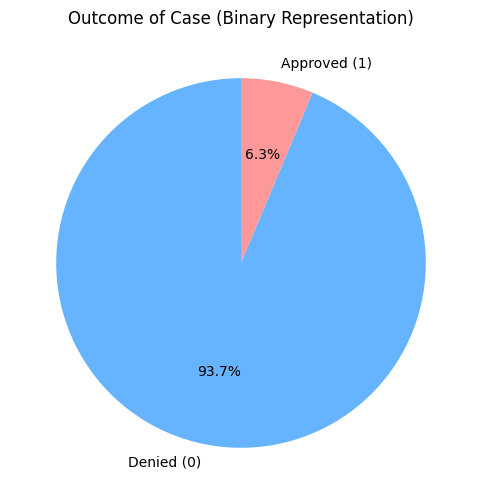

In [49]:
# ספירת הערכים הבינאריים בעמודת binary_outcome
binary_counts = dca_for_classifier['binary_outcome'].value_counts()

labels = ['Denied (0)','Approved (1)']

plt.figure(figsize=(6, 6))
plt.pie(binary_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Outcome of Case (Binary Representation)')

plt.show()

In [50]:
binary_counts

,count
binary_outcome,
0.0,680
1.0,46


In [51]:
file_path = 'dca_for_classifier.csv'  # נתיב לשמירה
dca_for_classifier.to_csv(file_path, index=False, encoding='utf-8')

print(f"הקובץ נשמר בהצלחה בנתיב: {file_path}")

הקובץ נשמר בהצלחה בנתיב: dca_for_classifier.csv


###

In [52]:
dca_for_classifier.head()

גוף המסמך  \
0  ['פסק-דין בתיק רע"פ 7861/03 בבית המשפט העליון רע"פ 7861/03 בפני: כבוד המישנה לנשיא (בדימ\') מ\' חשין כבוד השופטת ד\' ביניש כבוד השופט א\' ריבלין כבוד השופט א\' א\' לוי כבוד השופט ס\' ג\'ובראן המבקשת: מדינת ישראל נ ג ד המשיבה: המועצה האזורית גליל תחתון בקשת רשות ערעור על פסק-דינו של בית-המשפט המחוזי בנצרת מיום 3.6.03 בע"פ 397/02, שניתן על-ידי כב\' השופטים י\' כהן, א\' אברהם וג\' (דה-ליאו) לוי תאריך הישיבה: י"ח באדר א\' תשס"ה (27.2.05) בשם המבקשת: עו"ד מיכאל קרשן בשם המשיבה: עו"ד אילן גולדנברג פסק-דין המישנה לנשיא (בדימ\') מ\' חשין: ברחבי ישראל - בתחומיהן של ערים, מועצותמקומיות ומועצות אזוריות - פזורים, זעיר-שם זעיר-שם, מאות אתרים לסילוק פסולתלמיניה: אשפה, זבל, גרוטאות, פסולת צמחים, פסולת בעלי חיים, פסולת מן התעשיהוהחקלאות ועוד. אתרים אלה לסילוק פסולת, יש שהם מורשים על-פי דין ויש שאין הםמורשים ואין הם מוסדרים, לא על-פי דין ולא בכלל. זו הפעם אין ענייננו באתריםהמורשים אלא באתרים הבלתי-מורשים בלבד, וככינוים בלשון היומיום: אתרי פסולת"פיראטיים". אותם אתרים פיראטיים משמשים, בעיקרם, את היישובים הסמוכיםלהם - ביתר דיוק: היישובים שבתחום המועצה האזורית יצרו והקימו, כל אחד מהם לעצמו,אתר "פיראטי" לסילוק פסולת משל-עצמו - ואולם הלכה למעשה, כל דיכפין וכלדצריך ייתי וישליך באותם אתרים פסולת למיניה, ואין מְכַהֶה. אם כך באשר לצבירתהפסולת, לא כך באשר לטיפול באותם אתרים. אתרים אלה, אין מטפלים בהם כנדרש וממילאיוצרים הם מיפגעי סביבה למיניהם: ריחות חזקים ובלתי נעימים, זיהום אוויר קשה,זיהום מי תהום ועוד. השאלה הנשאלת היא, מי הוא זה ואיזה הוא האדם או הגוף האחראיםעל-פי דין לאותם מיפגעים? וביתר דיוק וחידוד: האם הרשות המקומית – בענייננו: המועצההאזורית – אחראית בפלילים בשל מחדליה לפקח כיאות על האתרים הפיראטיים ולהסדיר בהםאת הצורך הסדר? בית המשפט המחוזי פסק פסוקו כי המועצה האזורית גליל תחתון – המשיבהלערעור – אינה חייבת בפלילים בעניינם של אתרי פסולת פיראטיים שנמצאו בתחומה ואשרגרמו מיפגעי סביבה אלה ואחרים, והכרעת-דין זו העלתה המדינה לפנינו לביקורת. נפתחבעיקרי העובדות שלעניין, ובהליכים שהיו עד-כה. עיקרי העובדות שלעניין וההליכים שהיועד כה 2. ענייננו בשמונה אתרי פסולת פיראטיים (אתרי פסולת או האתרים או המיזבלות) אשר פעלו – וכמסתבר, ממשיכים הם לפעול – בשולי שמונהישובים שבשטח שיפוטה של המועצה האזורית גליל תחתון (המועצה או המועצה האזורית).האתרים הוקמו – אם הקמה הוא המושג הנכון – לפני עשרות בשנים, ותושבי הישוביםשבתחום שיפוטה של המועצה נהגו ונוהגים להשליך אליהם פסולת למיניה, פסולת ביתיתופסולת חקלאית. בסידרת ביקורות שערכו פקחי המשרד לאיכות הסביבה בשנים 1990 עד 1994,נמצאו באתרים אלה מיפגעי סביבה רבים, ובהם: ערימות פסולת מפוזרות ובלתי מכוסות;פיגרי חיות במצב ריקבון מתקדם; בעירות פסולת או סימני שריפה ובעירה; ריחות בלתינסבלים שהתפשטו באזור. לאחר אזהרות חוזרות ונישנות, הודעות וצווים לסילוק מיפגעים –והכל ללא הועיל, הוגש ביום 21.6.95 לבית-משפט השלום בנצרת כתב-אישום נגד המועצה,נגד ראש המועצה בשנים הרלוונטיות ונגד תברואן המועצה (שלושתם יחדיו – הנאשמים). 3. בהכרעת הדין סקר בית-משפט השלום (סגניתהנשיא, השופטת אביטל בית-נר) באריכות ובפרוטרוט את הראיות למיניהן שהובאו לפניובאשר לכל אתר ואתר מאתרי הפסולת, ולסופה של הכרעת הדין סיכם בית-המשפט את עיקרימימצאיו בלשון זו: 11. מהראיות שהובאו בפני ... עולה כי: א. במועדיםשונים היו בעירות או סימני בעירה וכן היה ריח רע באתרים: בית-רימון, כפר קיש,קיבוץ לביא, בית-קשת, שרונה, שדה אילן והודיות. בשדמות דבורה היו דיווחים על פגריםוריח בלתי נסבל, אך לאור ההגדרה בתקנה 2, לא אוכל לומר שהוכח כי לגבי אתר זה היהמפגע של ריח וזיהום אוויר בלתי סבירים. ב. בכלהאתרים שנמצאו בהן [כך] בעירות, הן לא כובו באופן מיידי, לא היתה פעולת כיסוייומיומית כנדרש וגם לא היה גידור מלא ושערים. ג. הנאשמיםלא מילאו אחר הודעות וצווים לסילוק מפגעים, שנשלחו אליהם למכביר. משקבע מימצאים אלה שקבע, החליט בית-משפט השלוםלהרשיע את הנאשמים כולם בעשיית עבירות שעברו על-פי דברי-חוק אחדים, בראשם החוקלמניעת מיפגעים, תשכ"א-1961 והתקנות שלפיו (בעיקר: עבירות שעניינן גרימת ריחוזיהום אוויר חזקים או בלתי סבירים). בה-בעת זיכה בית-המשפט את הנאשמים מעבירותאחרות שהואשמו בהן. משהרשיע את הנאשמים כך בדינם, גזר עליהם בית-המשפט עונשיםשונים – בעיקרם עונשי קנסות – והוסיף והורה על סגירת חמישה מתוך שמונה אתרי הפסולתשהיוו נושא לכתב-האישום אלא אם תעשה המועצה לתיקון הליקויים שנתגלו באותם אתרים. 4. הנאשמים ערער